<a href="https://colab.research.google.com/github/kayodeolusanya/Smoke-Detection-Project/blob/main/Smoke_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
# Importing libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the Dataset
raw_data = pd.read_csv('/content/smoke_detection_iot.csv')
raw_data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


## Data Dictionaries
UTC - The time when experiment was performed.

Temperature - Temperature of Surroundings. Measured in Celsius

Humidity - The air humidity during the experiment.

TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)

eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)

Raw H2 - The amount of Raw Hydrogen present in the surroundings.

Raw Ethanol - The amount of Raw Ethanol present in the surroundings.

Pressure - Air pressure. Measured in hPa

PM1.0 - Paticulate matter of diameter less than 1.0 micrometer.

PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.

NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.

NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.

NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.

CNT - Simple Count.

Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.


In [3]:
# Assisgning another variable df to raw data
df = raw_data

# Removing of Unnamed column from the dataset (formerly used for indexing)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0


In [4]:
# To check for missing values
df.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [5]:
# To check for duplicate values
df.duplicated().sum()

0

In [6]:
# Checking for null/missing values
df.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [7]:
# To highlight the row(s) with Missing value
df[df.isnull().any(axis=1)]

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm


In [8]:
# Removing the missing data
df.dropna(inplace=True)

In [9]:
# Checking for null/missing values
df.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [10]:
# To view the shape of the dataset
df.shape

(62630, 15)

In [11]:
# To view the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [12]:
# Describing the features in the data
df.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [13]:
# Converting the UTC feature from interger to datetime
df['UTC'] = pd.to_datetime(df['UTC'], utc=True, unit='s')

# Converting the UTC feature from float to interger
df['Fire Alarm'] = df['Fire Alarm'].astype('int')
df.head(3)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,2022-06-09 00:08:51+00:00,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,2022-06-09 00:08:52+00:00,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2022-06-09 00:08:53+00:00,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0


## Exploratory Data Analysis

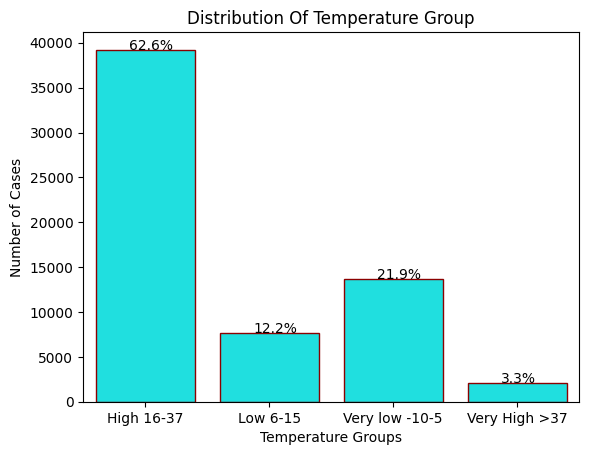

In [14]:
#  Creating a Temperature Group

def temp_group(temperature):
    if temperature <=5:
        return "Very low -10-5"
    elif temperature <= 15:
        return "Low 6-15"
    elif temperature <= 37:
        return "High 16-37"
    else:
        return "Very High >37"

# Creating a new column for Temperature group
df["temp_group"] = df["Temperature[C]"].apply(temp_group)

# Plotting the Visualization for temp Group
ax= sns.countplot(x='temp_group', data=df, color='cyan', ec='darkred')
plt.title('Distribution Of Temperature Group')
plt.ylabel('Number of Cases')
plt.xlabel('Temperature Groups')

# Adding data labels to the bars
total = float(len(df['temp_group']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.5 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))
plt.show()

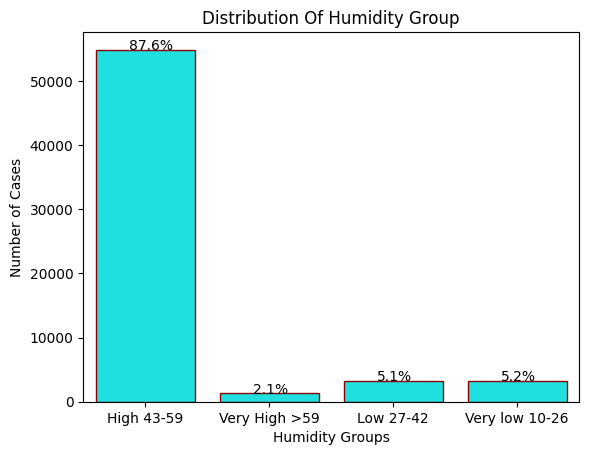

In [15]:
#  Creating a Humidity Group

def hum_group(humidity):
    if humidity <= 26:
        return "Very low 10-26"
    elif humidity <= 42:
        return "Low 27-42"
    elif humidity <= 59:
        return "High 43-59"
    else:
        return "Very High >59"

# Creating a new column for Temperature group
df["hum_group"] = df["Humidity[%]"].apply(hum_group)

# Plotting the Visualization for temp Group
ax= sns.countplot(x='hum_group', data=df, color='cyan', ec='darkred')
plt.title('Distribution Of Humidity Group')
plt.ylabel('Number of Cases')
plt.xlabel('Humidity Groups')

# Adding data labels to the bars
total = float(len(df['hum_group']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.5 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))
plt.show()

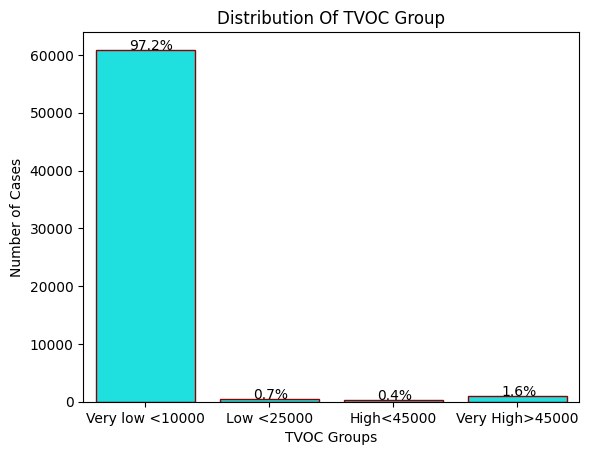

In [93]:
#  Creating a TVOC[ppb] Group

def tvoc_group(TVOC):
    if TVOC <=10000:
        return "Very low <10000"
    elif TVOC <=25000:
        return "Low <25000"
    elif TVOC <=45000:
        return "High<45000"
    else:
        return "Very High>45000"


# Create a new column for age category
df["tvoc_group"] = df["TVOC[ppb]"].apply(tvoc_group)

# Plotting the Visualization for temp Group
ax= sns.countplot(x='tvoc_group', data=df, color='cyan', ec='darkred')
plt.title('Distribution Of TVOC Group')
plt.ylabel('Number of Cases')
plt.xlabel('TVOC Groups')

# Adding data labels to the bars
total = float(len(df['temp_group']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.5 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))
plt.show()

In [91]:
df["TVOC[ppb]"].max()

60000

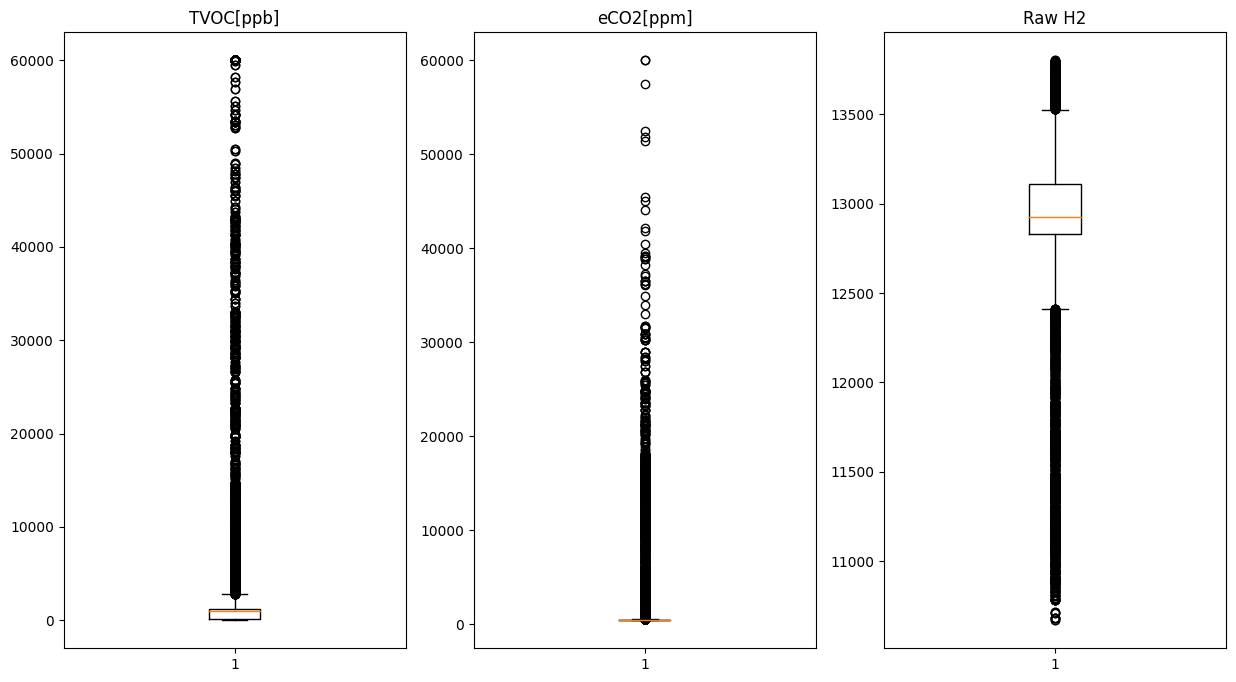

In [24]:
# Visualizing the outlier of the data for TVOC[ppb, eCO2[ppm] and Raw H2
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,8))

ax1.boxplot(df["TVOC[ppb]"])
ax1.set_title("TVOC[ppb] Distribution")

ax2.boxplot(df["eCO2[ppm]"])
ax2.set_title("eCO2[ppm] Distribution")

ax3.boxplot(df["Raw H2"])
ax3.set_title("Raw H2 Distribution")

plt.show()

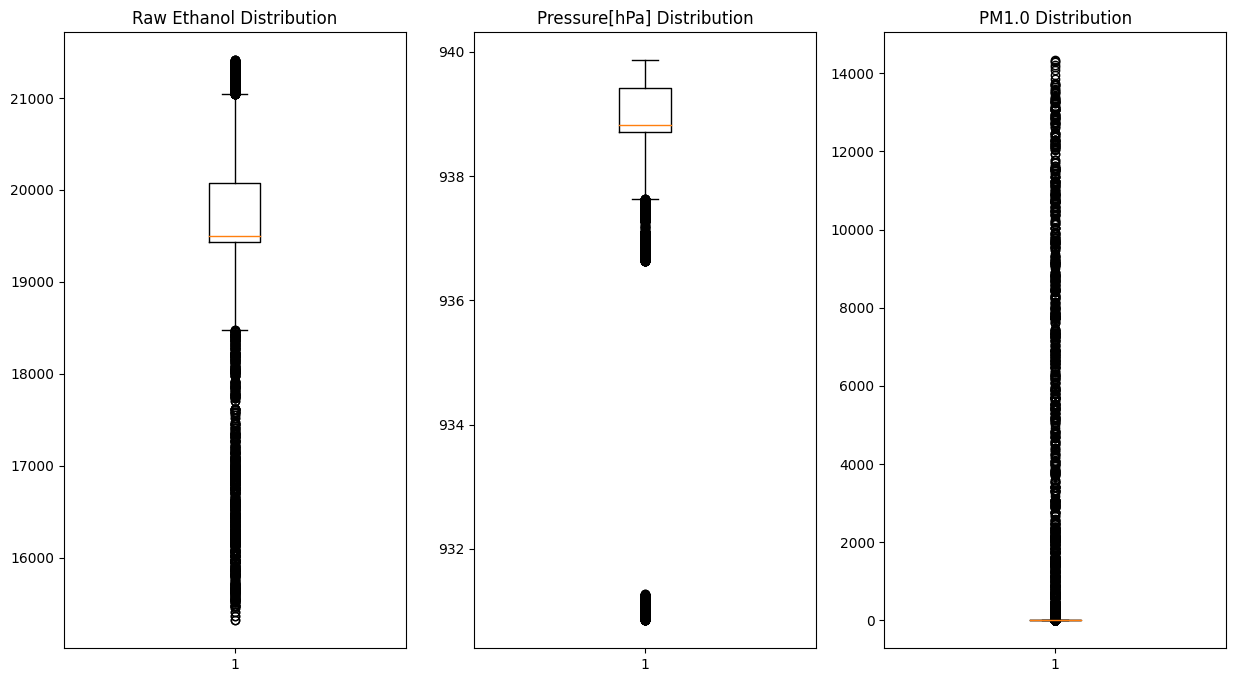

In [29]:
# Visualizing the outlier of the data for Raw Ethanol, Pressure[hPa] and PM1.0
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,8))

ax1.boxplot(df["Raw Ethanol"])
ax1.set_title("Raw Ethanol Distribution")

ax2.boxplot(df["Pressure[hPa]"])
ax2.set_title("Pressure[hPa] Distribution")

ax3.boxplot(df["PM1.0"])
ax3.set_title("PM1.0 Distribution")

plt.show()

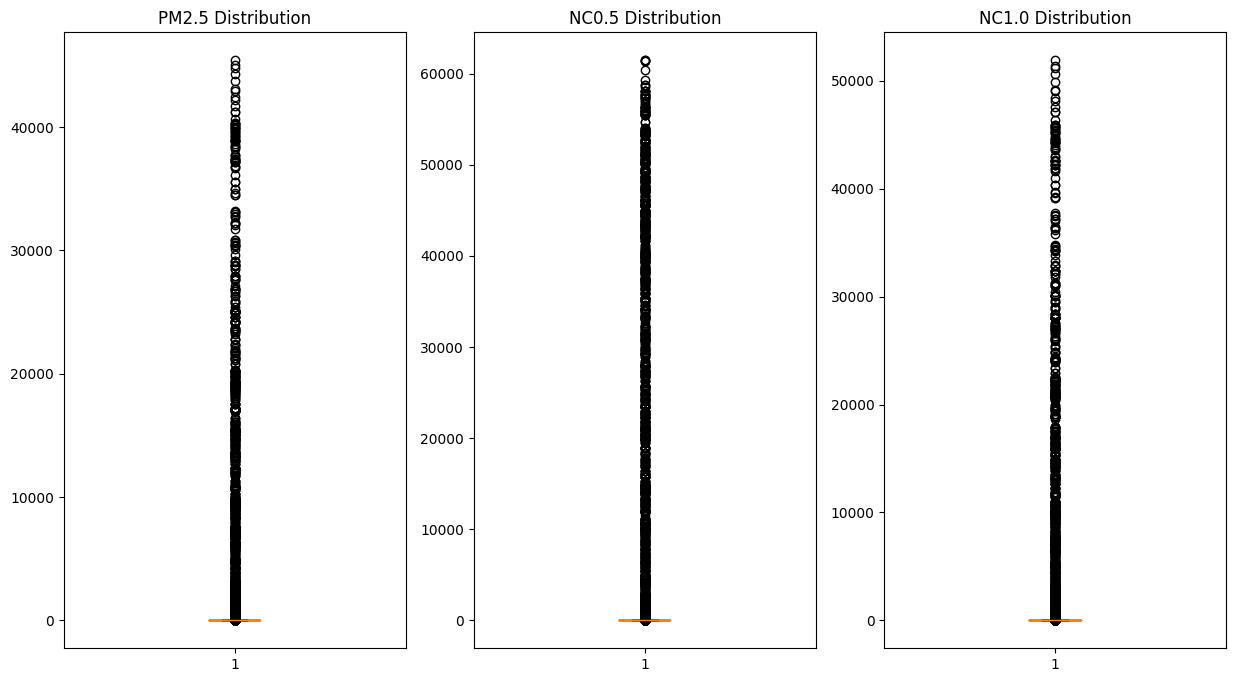

In [31]:
# Visualizing the outlier of the data for TVOC[ppb, eCO2[ppm] and Raw H2
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,8))

ax1.boxplot(df["PM2.5"])
ax1.set_title("PM2.5 Distribution")

ax2.boxplot(df["NC0.5"])
ax2.set_title("NC0.5 Distribution")

ax3.boxplot(df["NC1.0"])
ax3.set_title("NC1.0 Distribution")

plt.show()

In [30]:
df.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm', 'temp_group', 'hum_group'],
      dtype='object')

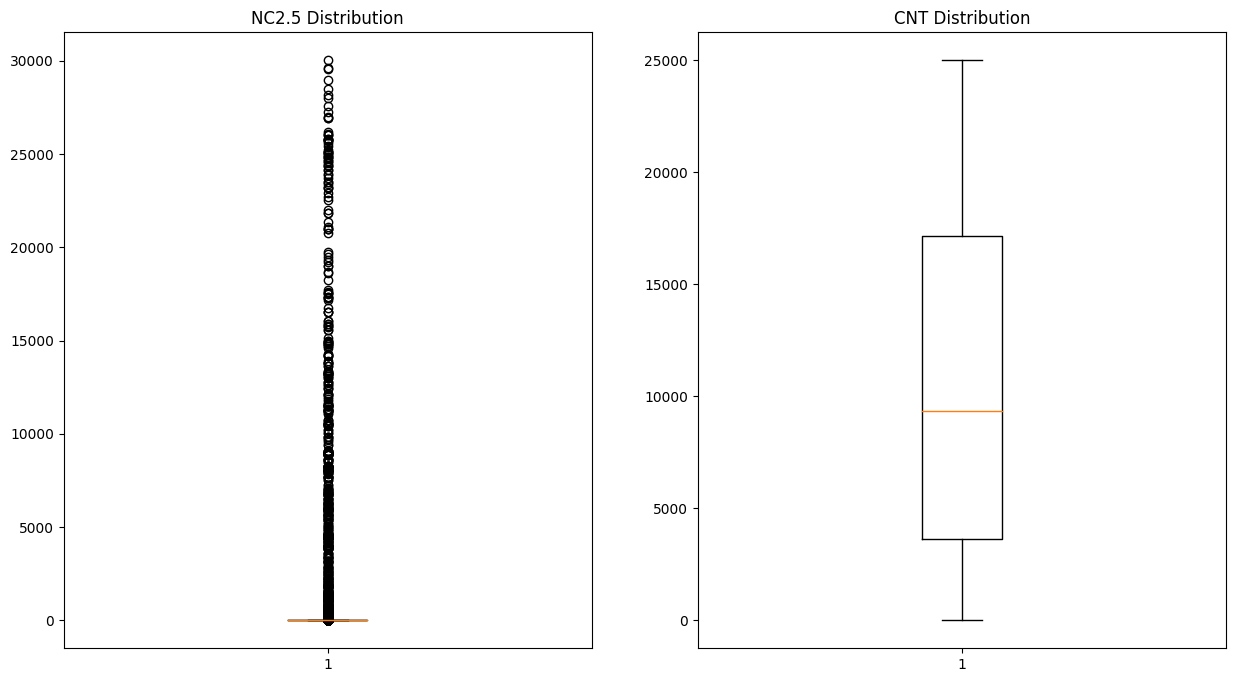

In [32]:
# Visualizing the outlier of the data for TVOC[ppb, eCO2[ppm] and Raw H2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.boxplot(df["NC2.5"])
ax1.set_title("NC2.5 Distribution")

ax2.boxplot(df["CNT"])
ax2.set_title("CNT Distribution")

plt.show()

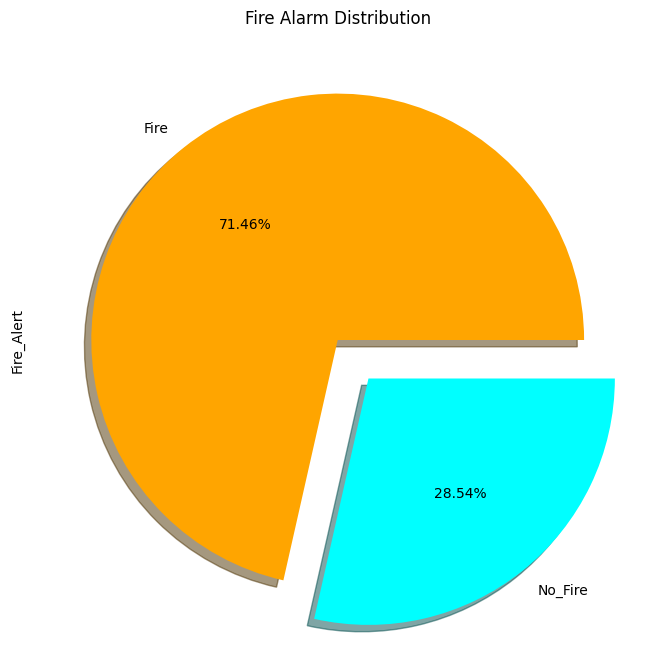

In [62]:
# Creating a function that categorise Fire Alarm into 2 (1 = Fire Presence, 0 = No Fire)
def fireA(Fire_Alarm):
    if Fire_Alarm == 1:
        return 'Fire'
    else:
        return 'No_Fire'

df['Fire_Alert'] = df['Fire Alarm'].apply(fireA)

#Create visualization for Fire Alarm using Fire Pres Column
plt.figure(figsize = (10,8))
df['Fire_Alert'].value_counts().plot.pie(autopct="%.2f%%", shadow = True, explode=(0,0.2), colors=['orange','cyan'])
plt.title('Fire Alarm Distribution')
plt.show()

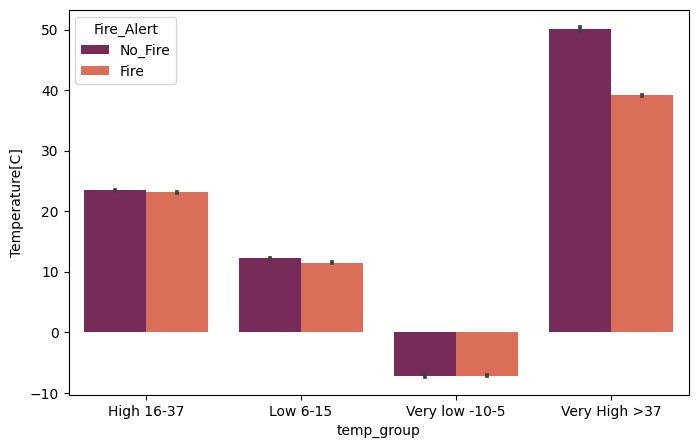

In [99]:
plt.figure(figsize= (8,5))
ax = sns.barplot( x='temp_group', y='Temperature[C]', data=df, hue='Fire_Alert', palette='rocket')
plt.show()

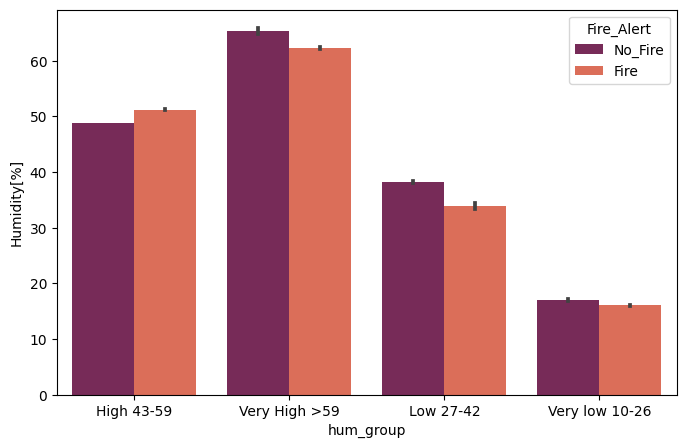

In [97]:
plt.figure(figsize= (8,5))
sns.barplot( x='hum_group', y='Humidity[%]', data=df, hue='Fire_Alert', palette='rocket')
plt.show()

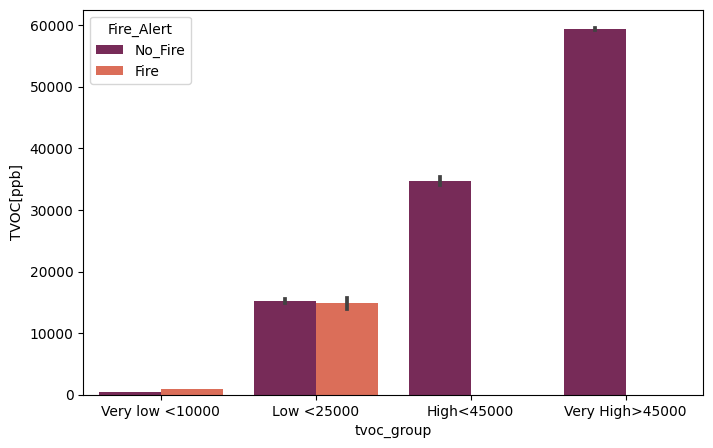

In [98]:
plt.figure(figsize= (8,5))
sns.barplot( x='tvoc_group', y='TVOC[ppb]', data=df, hue='Fire_Alert',palette='rocket')
plt.show()

## Multivariate Analysis

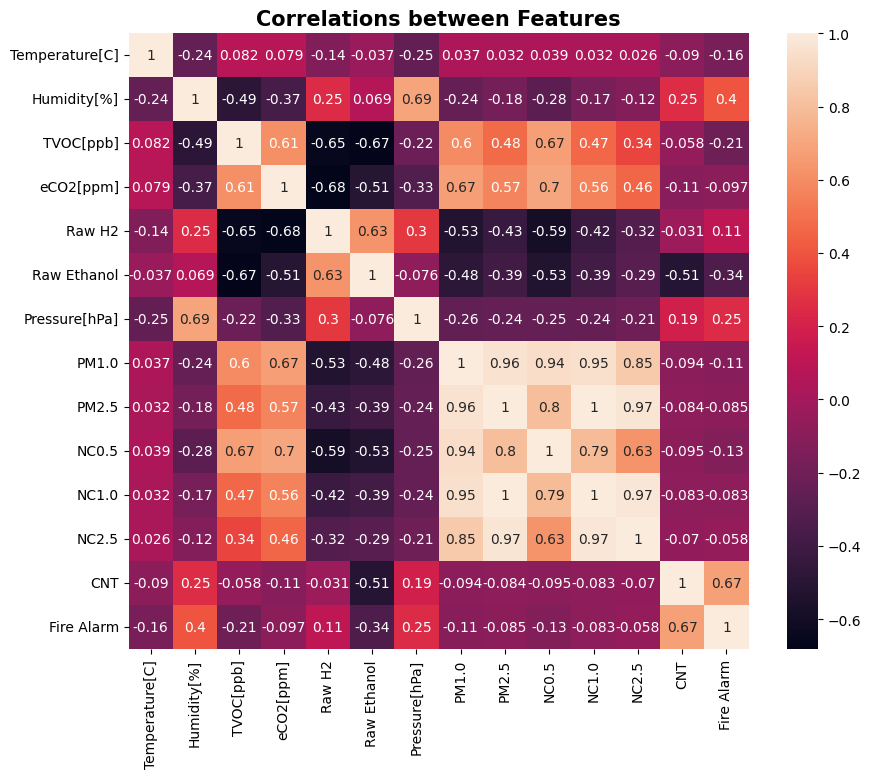

In [77]:
#  Correlation between variables in the dataset
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlations between Features', fontsize=15, weight=("bold"))
plt.show()